# Aplicación TSNE y DBSCAN

####  Se realizará una reducción de dimensión en los datos procesados de demanda energética y se aplicará el algoritmo de DBSCAN para intentar identificar clusters.

In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv('../data/processed/processed_data_energy.csv')
df.head()

,hora,dia,mes,anio,tmax-cab,tmax-hmo,tmax-obr,tmax-lmo,tmax-cul,tmin-cab,...,martes_postfestivo,semana_santa,1_mayo,10_mayo,16_sep,2_nov.,pre-navidad_y_new_year,navidad_y_new_year,post-navidad_y_new_year,demanda_energia
0,0,1,1,2007,21.0,22.0,25.0,30.0,29.0,2.0,...,0,0,0,0,0,0,0,1,0,1394
1,1,1,1,2007,21.0,22.0,25.0,30.0,29.0,2.0,...,0,0,0,0,0,0,0,1,0,1297
2,2,1,1,2007,21.0,22.0,25.0,30.0,29.0,2.0,...,0,0,0,0,0,0,0,1,0,1255
3,3,1,1,2007,21.0,22.0,25.0,30.0,29.0,2.0,...,0,0,0,0,0,0,0,1,0,1222
4,4,1,1,2007,21.0,22.0,25.0,30.0,29.0,2.0,...,0,0,0,0,0,0,0,1,0,1168


In [41]:
# Convertimos el dataframe a un arreglo numpy
X = np.array(df)

#### Aplicaremos primero el método TSNE de reducción de dimensionalidad. Probaremos con varios parámetros, en este caso, distintos valores para perplexity y early_exaggeration.

In [4]:
perplexities = [80, 90, 100]
early_exaggerations = [60, 70]

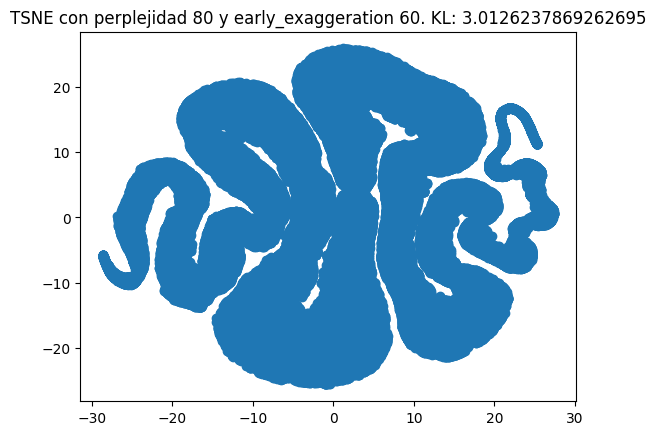

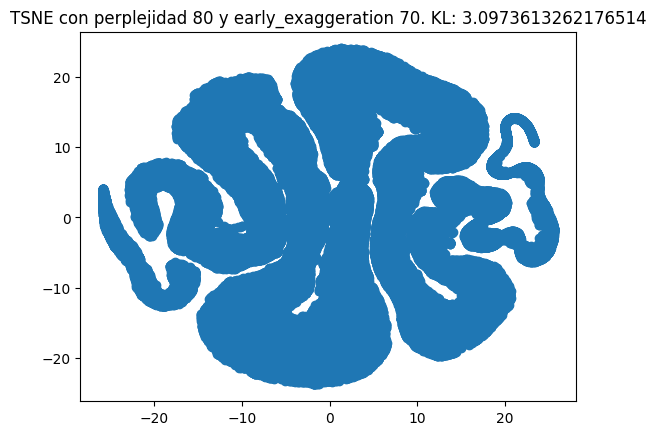

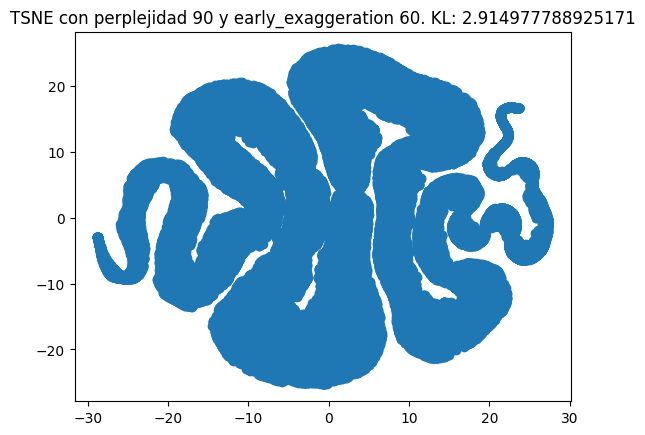

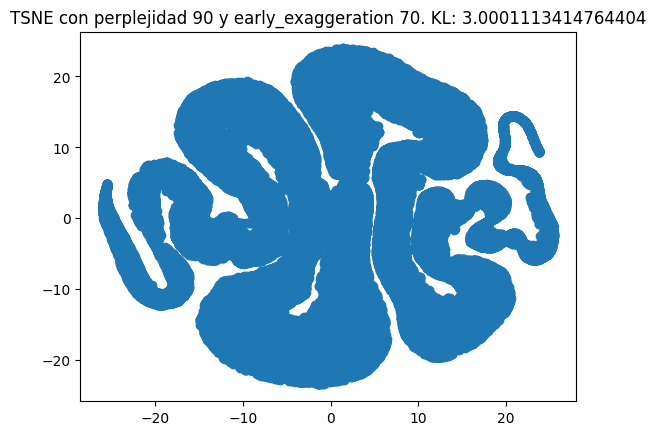

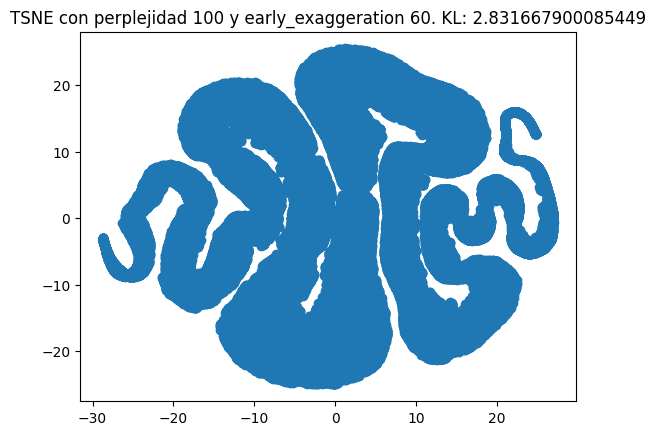

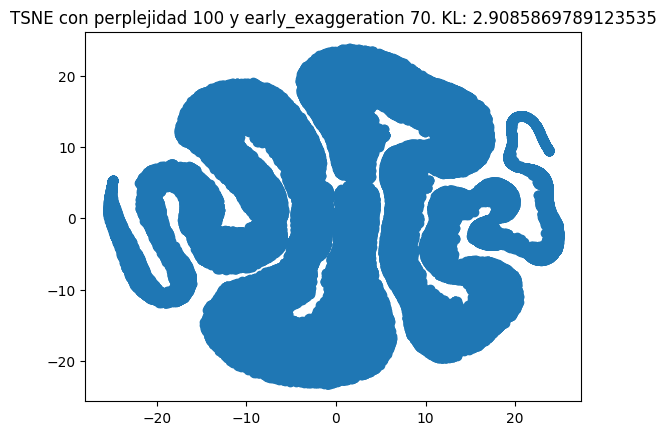

In [32]:
for perplexity in perplexities:
    for early_exaggeration in early_exaggerations:
        tsne = TSNE(n_components =2 , n_iter = 500, perplexity = perplexity, early_exaggeration = early_exaggeration)
        X_embedded = tsne.fit_transform(X)
        plt.title(f'TSNE con perplejidad {perplexity} y early_exaggeration {early_exaggeration}. KL: {tsne.kl_divergence_}')
        plt.scatter(X_embedded[:,0], X_embedded[:,1])
        plt.show()


Los procedimientos anteriores llegan a resultados similares. Consideraremos los datos con menor divergencia de Kullback-Leibler, esto es, los obtenidos con la reducción de dimensionalidad con perplejidad 100 y early_exaggeration 60.

In [42]:
X_embedded = TSNE(n_components =2 , n_iter = 500, perplexity = 100, early_exaggeration = 60).fit_transform(X)

### Algoritmo DBSCAN

#### Para este algoritmo de aprendizaje no supervisado, probaremos distintos valores para eps y min_samples, donde el primero es la distancia máxima para la cual dos puntos se consideran vecinos, y la última el número mínimo de vecinos para que un punto se considere "core" o núcleo. Aplicaremos este método en el conjunto de puntos X_embedded.

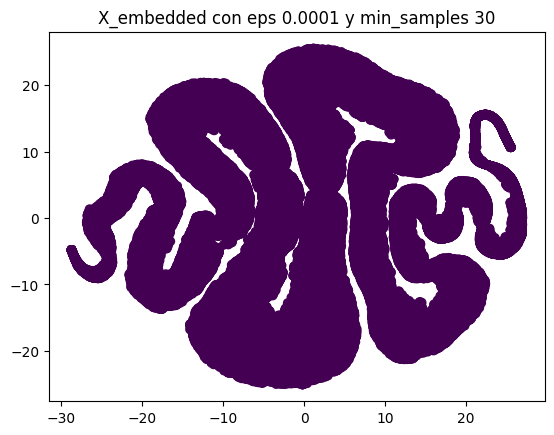

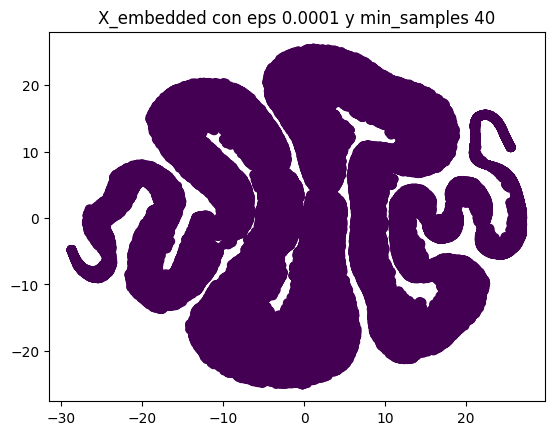

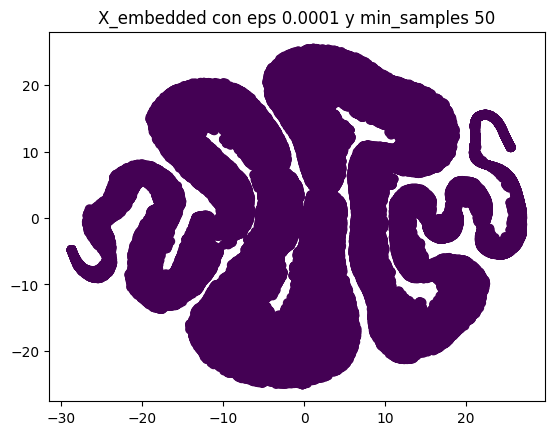

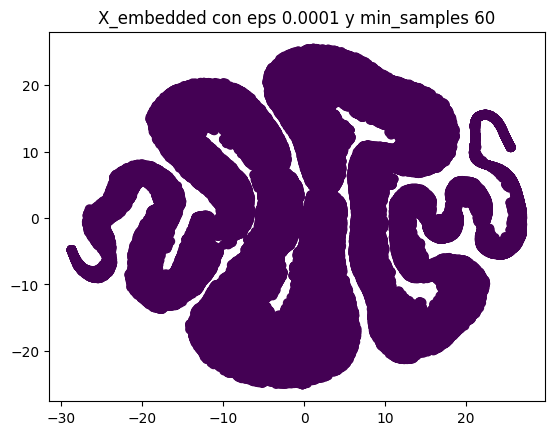

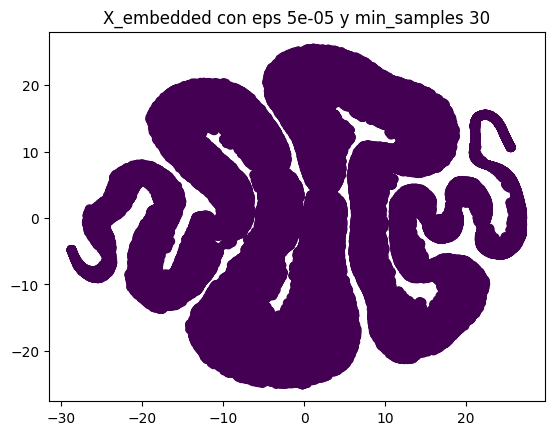

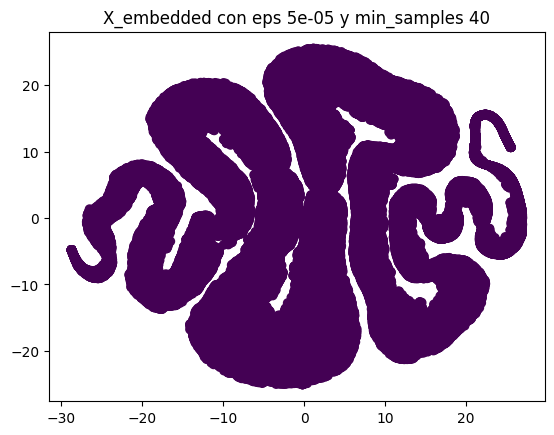

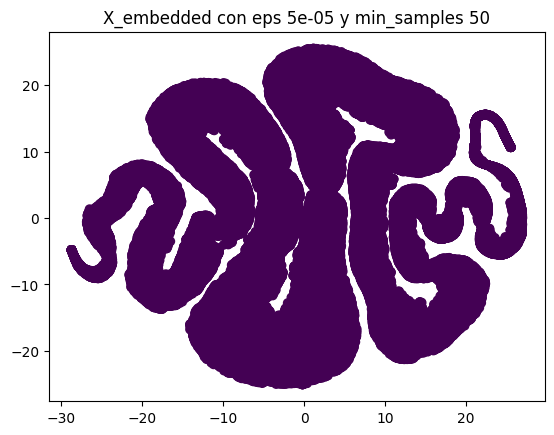

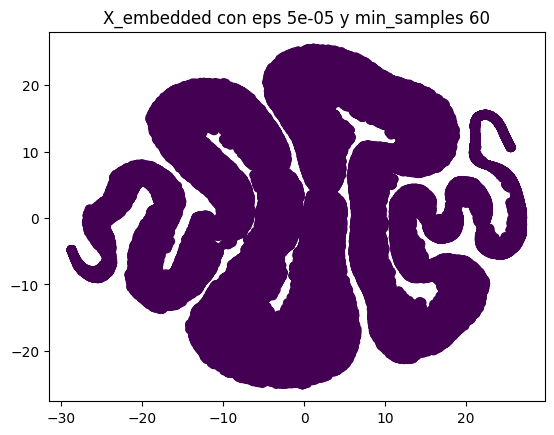

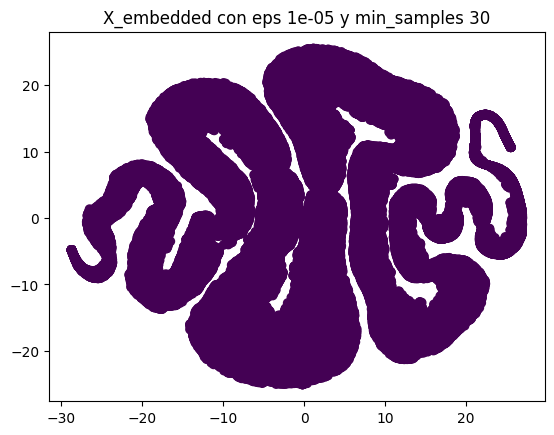

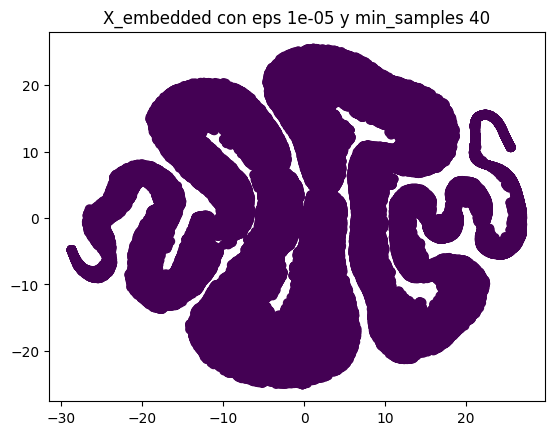

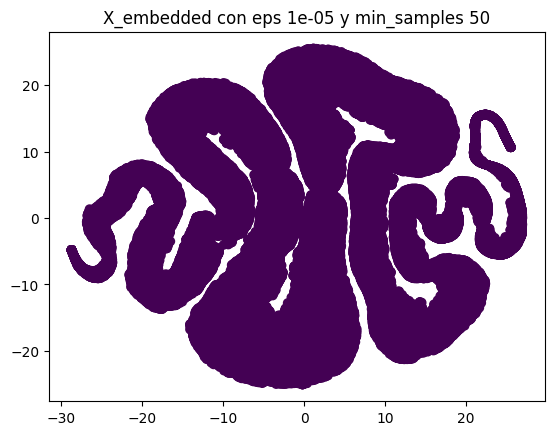

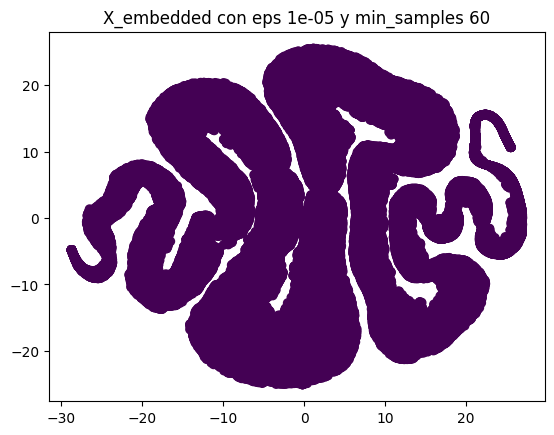

In [47]:
for eps in [0.0001, 0.00005, 0.00001]:
    for min_sample in [30, 40, 50, 60]:
        clustering = DBSCAN(eps = eps, min_samples=min_sample).fit(X)
        plt.title(f'X_embedded con eps {eps} y min_samples {min_sample}')
        plt.scatter(X_embedded[:,0], X_embedded[:,1], c = clustering.labels_)
        plt.show()

El algoritmo no encontró clusters distintos con los parámetros probados.